In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline
from datetime import datetime

In [17]:
df = pd.read_csv('Data Set 2.csv')
df.head()

,OrderId,CustomerId,LocationId,channel,Amount,OrderDate,BillNo
0,35623100,6662,4416,foodpanda,267,1/1/2018,DEL
1,35622814,8237,4002,zomato,1051,1/1/2018,DEL
2,35623284,11912,4416,takeaway,714,1/1/2018,DEL
3,35631171,14563,218,zomato,834,1/1/2018,GGN
4,35635515,14833,295,call,544,1/1/2018,DEL


In [18]:
df['OrderDate']= pd.to_datetime(df['OrderDate'])

In [19]:
df['OrderDate'].dtypes

dtype('<M8[ns]')

In [20]:
df['OrderPeriod'] = df.OrderDate.apply(lambda x: x.strftime('%Y-%m'))

In [21]:
df.head()

,OrderId,CustomerId,LocationId,channel,Amount,OrderDate,BillNo,OrderPeriod
0,35623100,6662,4416,foodpanda,267,2018-01-01,DEL,2018-01
1,35622814,8237,4002,zomato,1051,2018-01-01,DEL,2018-01
2,35623284,11912,4416,takeaway,714,2018-01-01,DEL,2018-01
3,35631171,14563,218,zomato,834,2018-01-01,GGN,2018-01
4,35635515,14833,295,call,544,2018-01-01,DEL,2018-01


In [22]:
df.set_index('CustomerId', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

,CustomerId,OrderId,LocationId,channel,Amount,OrderDate,BillNo,OrderPeriod,CohortGroup
0,6662,35623100,4416,foodpanda,267,2018-01-01,DEL,2018-01,2018-01
1,8237,35622814,4002,zomato,1051,2018-01-01,DEL,2018-01,2018-01
2,11912,35623284,4416,takeaway,714,2018-01-01,DEL,2018-01,2018-01
3,14563,35631171,218,zomato,834,2018-01-01,GGN,2018-01,2018-01
4,14833,35635515,295,call,544,2018-01-01,DEL,2018-01,2018-01


In [40]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])
cohort = grouped.agg({'CustomerId': pd.Series.nunique,
                       'OrderId': pd.Series.nunique,
                       'Amount': np.sum})
cohort.rename(columns={'CustomerId': 'TotalUsers',
                        'OrderId': 'TotalOrders'}, inplace=True)
cohort.head()

TotalUsers  TotalOrders    Amount
CohortGroup OrderPeriod                                   
2018-01     2018-01           17181        23734  14386922
            2018-02            4041         7505   3869213
            2018-03            3540         6604   3521918
            2018-04            3146         5784   3186872
            2018-05            2799         5085   2749291

In [41]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df
cohort = coh.groupby(level=0).apply(cohort_period)
cohort.head()

TotalUsers  TotalOrders    Amount  CohortPeriod
CohortGroup OrderPeriod                                                 
2018-01     2018-01           17181        23734  14386922             1
            2018-02            4041         7505   3869213             2
            2018-03            3540         6604   3521918             3
            2018-04            3146         5784   3186872             4
            2018-05            2799         5085   2749291             5

In [42]:
cohort.head()

TotalUsers  TotalOrders    Amount  CohortPeriod
CohortGroup OrderPeriod                                                 
2018-01     2018-01           17181        23734  14386922             1
            2018-02            4041         7505   3869213             2
            2018-03            3540         6604   3521918             3
            2018-04            3146         5784   3186872             4
            2018-05            2799         5085   2749291             5

In [43]:
cohort.reset_index(inplace=True)
cohort.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)
cohort_group_size = cohort['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2018-01    17181
2018-02    13037
2018-03    11657
2018-04    11473
2018-05    12790
Name: TotalUsers, dtype: int64

In [44]:
cohort['TotalUsers'].head()


CohortGroup  CohortPeriod
2018-01      1               17181
             2                4041
             3                3540
             4                3146
             5                2799
Name: TotalUsers, dtype: int64

In [45]:
cohort['TotalUsers'].unstack(0).head()

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
CohortPeriod,,,,,,,,,,,,,,,,
1,17181.0,13037.0,11657.0,11473.0,12790.0,14105.0,15967.0,12343.0,17193.0,19395.0,24605.0,18603.0,12370.0,17641.0,26329.0,7309.0
2,4041.0,2015.0,1629.0,1435.0,1293.0,1384.0,1294.0,1095.0,1880.0,2819.0,2613.0,1638.0,1390.0,2580.0,1647.0,NaN
3,3540.0,1866.0,1217.0,1097.0,1022.0,930.0,1181.0,803.0,1613.0,1414.0,1333.0,1478.0,1343.0,774.0,NaN,NaN
4,3146.0,1545.0,1044.0,1023.0,828.0,904.0,1110.0,881.0,1081.0,836.0,1832.0,1602.0,408.0,NaN,NaN,NaN
5,2799.0,1282.0,939.0,834.0,784.0,793.0,1180.0,775.0,736.0,1159.0,1963.0,519.0,NaN,NaN,NaN,NaN


In [47]:
RetainedUsers = cohort['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
RetainedUsers.head(10)

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
CohortPeriod,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.235202,0.154560,0.139744,0.125076,0.101095,0.098121,0.081042,0.088714,0.109347,0.145347,0.106198,0.088050,0.112369,0.146250,0.062555,NaN
3,0.206042,0.143131,0.104401,0.095616,0.079906,0.065934,0.073965,0.065057,0.093817,0.072905,0.054176,0.079450,0.108569,0.043875,NaN,NaN
4,0.183109,0.118509,0.089560,0.089166,0.064738,0.064091,0.069518,0.071376,0.062874,0.043104,0.074456,0.086115,0.032983,NaN,NaN,NaN
5,0.162913,0.098336,0.080552,0.072692,0.061298,0.056221,0.073902,0.062789,0.042808,0.059758,0.079781,0.027899,NaN,NaN,NaN,NaN
6,0.140446,0.090972,0.072489,0.067986,0.054418,0.060900,0.058496,0.049421,0.055255,0.065120,0.026092,NaN,NaN,NaN,NaN,NaN
7,0.136255,0.083148,0.066998,0.057265,0.058249,0.057497,0.044404,0.054525,0.066015,0.020882,NaN,NaN,NaN,NaN,NaN,NaN
8,0.120598,0.080233,0.055417,0.062233,0.057701,0.042255,0.050980,0.064733,0.021113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.114487,0.065506,0.064511,0.065371,0.043315,0.049840,0.063443,0.022766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


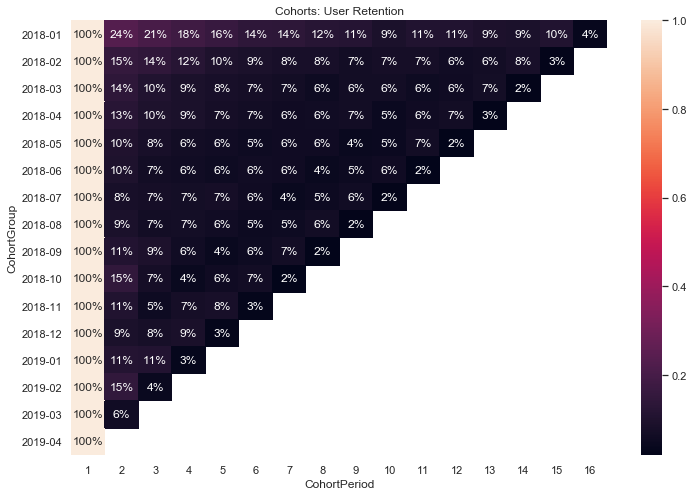

In [55]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
Cohort_Heatmap = sns.heatmap(RetainedUsers.T, mask=RetainedUsers.T.isnull(), annot=True, fmt='.0%')

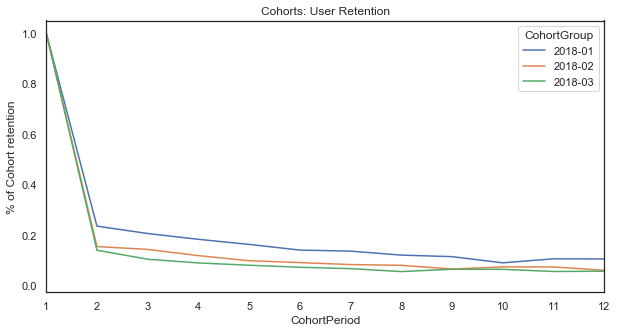

In [56]:
#User Retention for the month 1,2,3 (2018)
RetainedUsers[['2018-01','2018-02','2018-03']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort retention');